In [1]:
from   sklearn.linear_model    import LinearRegression
from   sklearn.metrics         import mean_squared_error, r2_score
import scipy.stats             as     stats
import statsmodels.api         as     sm
import pandas                  as     pd
import numpy                   as     np
import plotly
import plotly.plotly           as     py
import plotly.graph_objs       as     go
import seaborn                 as     sns
import matplotlib.pyplot       as     plt
from   config                  import plotly_id, plotly_key
import warnings

plotly.tools.set_credentials_file(username=plotly_id, api_key=plotly_key)
sns.set(color_codes=True)
warnings.filterwarnings('ignore')

# Dummy Encoding

In [2]:
medals = pd.read_pickle('../dat/medals.pkl')
print(medals.shape)
medals.head()

(3837, 15)


,Year,Summer,Games,Host,NOC,Region,Athletes,Females,Sports,Events,Medals,Golds,Silvers,Bronzes,Athletes per Event
0,1896,1,1896 Summer,0,AUS,Australia,5,0,2,5,3,2,0,1,1.000
1,1896,1,1896 Summer,0,AUT,Austria,8,0,3,8,5,2,1,2,1.000
2,1896,1,1896 Summer,0,DEN,Denmark,15,0,5,12,6,1,2,3,1.250
3,1896,1,1896 Summer,0,FRA,France,26,0,6,18,11,5,4,2,1.444
4,1896,1,1896 Summer,0,GBR,UK,25,0,7,19,9,3,3,3,1.316


In [3]:
# create dummy variables
model        = pd.get_dummies(data=medals, columns=['NOC'])
model['NOC'] = medals['NOC']
print(model.shape)
model.head()

(3837, 245)


,Year,Summer,Games,Host,Region,Athletes,Females,Sports,Events,Medals,...,NOC_VIN,NOC_VNM,NOC_WIF,NOC_YAR,NOC_YEM,NOC_YMD,NOC_YUG,NOC_ZAM,NOC_ZIM,NOC
0,1896,1,1896 Summer,0,Australia,5,0,2,5,3,...,0,0,0,0,0,0,0,0,0,AUS
1,1896,1,1896 Summer,0,Austria,8,0,3,8,5,...,0,0,0,0,0,0,0,0,0,AUT
2,1896,1,1896 Summer,0,Denmark,15,0,5,12,6,...,0,0,0,0,0,0,0,0,0,DEN
3,1896,1,1896 Summer,0,France,26,0,6,18,11,...,0,0,0,0,0,0,0,0,0,FRA
4,1896,1,1896 Summer,0,UK,25,0,7,19,9,...,0,0,0,0,0,0,0,0,0,GBR


# Train / Test Split

In [4]:
model = model[model['Year'] >= 1992]
model = model.reset_index().drop(['index'], axis=1)
print(model.shape)
model.head()

(1913, 245)


,Year,Summer,Games,Host,Region,Athletes,Females,Sports,Events,Medals,...,NOC_VIN,NOC_VNM,NOC_WIF,NOC_YAR,NOC_YEM,NOC_YMD,NOC_YUG,NOC_ZAM,NOC_ZIM,NOC
0,1992,1,1992 Summer,0,Curacao,4,1,3,4,0,...,0,0,0,0,0,0,0,0,0,AHO
1,1992,1,1992 Summer,0,Albania,9,2,4,8,0,...,0,0,0,0,0,0,0,0,0,ALB
2,1992,1,1992 Summer,0,Algeria,36,2,7,27,2,...,0,0,0,0,0,0,0,0,0,ALG
3,1992,1,1992 Summer,0,Andorra,8,1,5,5,0,...,0,0,0,0,0,0,0,0,0,AND
4,1992,1,1992 Summer,0,Angola,33,6,6,21,0,...,0,0,0,0,0,0,0,0,0,ANG


In [5]:
y = model[['Medals','Golds','Silvers','Bronzes','Year','NOC','Region']]
print(y.shape)
y.head()

(1913, 7)


,Medals,Golds,Silvers,Bronzes,Year,NOC,Region
0,0,0,0,0,1992,AHO,Curacao
1,0,0,0,0,1992,ALB,Albania
2,2,1,0,1,1992,ALG,Algeria
3,0,0,0,0,1992,AND,Andorra
4,0,0,0,0,1992,ANG,Angola


In [41]:
X = model[['Summer', 'Host', 'Athletes', 'Events', 'Athletes per Event', 'Year', 'NOC', 'Region',
           'NOC_ARG','NOC_AUS','NOC_AZE','NOC_BRA','NOC_CHN',
           'NOC_CRO','NOC_CZE','NOC_DEN','NOC_ESP','NOC_FIJ',
           'NOC_GBR','NOC_GER','NOC_IND','NOC_JAM','NOC_JPN',
           'NOC_KAZ','NOC_KOR','NOC_NED','NOC_NGR','NOC_NOR',
           'NOC_POL','NOC_RUS','NOC_SRB','NOC_UKR','NOC_USA',
           'NOC_UZB','NOC_COL']]
print(X.shape)
X.head()

(1913, 35)


,Summer,Host,Athletes,Events,Athletes per Event,Year,NOC,Region,NOC_ARG,NOC_AUS,...,NOC_NED,NOC_NGR,NOC_NOR,NOC_POL,NOC_RUS,NOC_SRB,NOC_UKR,NOC_USA,NOC_UZB,NOC_COL
0,1,0,4,4,1.000,1992,AHO,Curacao,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,9,8,1.125,1992,ALB,Albania,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,36,27,1.333,1992,ALG,Algeria,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,8,5,1.600,1992,AND,Andorra,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,33,21,1.571,1992,ANG,Angola,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
X_train = X[X['Year'] <  2016]
X_test  = X[X['Year'] == 2016]
X_test  = X_test.reset_index().drop(['index'], axis=1)
print(X_train.shape)
print(X_test.shape)

y_train = y[y['Year'] <  2016]
y_test  = y[y['Year'] == 2016]
y_test  = y_test.reset_index().drop(['index'], axis=1)
print(y_train.shape)
print(y_test.shape)

(1706, 35)
(207, 35)
(1706, 7)
(207, 7)


In [43]:
X_train.head()

,Summer,Host,Athletes,Events,Athletes per Event,Year,NOC,Region,NOC_ARG,NOC_AUS,...,NOC_NED,NOC_NGR,NOC_NOR,NOC_POL,NOC_RUS,NOC_SRB,NOC_UKR,NOC_USA,NOC_UZB,NOC_COL
0,1,0,4,4,1.000,1992,AHO,Curacao,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,9,8,1.125,1992,ALB,Albania,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,36,27,1.333,1992,ALG,Algeria,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,8,5,1.600,1992,AND,Andorra,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,33,21,1.571,1992,ANG,Angola,0,0,...,0,0,0,0,0,0,0,0,0,0


# Linear Regression Training Model

In [44]:
# Create linear regression objects
regr_golds   = LinearRegression()
regr_silvers = LinearRegression()
regr_bronzes = LinearRegression()

In [45]:
# Train the models using the training sets
regr_golds.fit(  X_train.drop(['Year','NOC','Region'], axis=1), y_train['Golds'])
regr_silvers.fit(X_train.drop(['Year','NOC','Region'], axis=1), y_train['Silvers'])
regr_bronzes.fit(X_train.drop(['Year','NOC','Region'], axis=1), y_train['Bronzes'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [46]:
# Make predictions using the training sets
y_train['Golds Prediction']   = pd.DataFrame(
    regr_golds.predict(X_train.drop(['Year','NOC','Region'], axis=1)), columns=['Golds Prediction'])
y_train['Golds Prediction']   = y_train['Golds Prediction'].astype('int64')
y_train['Golds Prediction']   = y_train['Golds Prediction'].clip(lower=0)

y_train['Silvers Prediction'] = pd.DataFrame(
    regr_silvers.predict(X_train.drop(['Year','NOC','Region'], axis=1)), columns=['Silvers Prediction'])
y_train['Silvers Prediction'] = y_train['Silvers Prediction'].astype('int64')
y_train['Silvers Prediction'] = y_train['Silvers Prediction'].clip(lower=0)

y_train['Bronzes Prediction'] = pd.DataFrame(
    regr_bronzes.predict(X_train.drop(['Year','NOC','Region'], axis=1)), columns=['Bronzes Prediction'])
y_train['Bronzes Prediction'] = y_train['Bronzes Prediction'].astype('int64')
y_train['Bronzes Prediction'] = y_train['Bronzes Prediction'].clip(lower=0)

y_train['Medals Prediction']  = y_train['Golds Prediction'] + y_train['Silvers Prediction'] + y_train['Bronzes Prediction']
y_train.head()

,Medals,Golds,Silvers,Bronzes,Year,NOC,Region,Golds Prediction,Silvers Prediction,Bronzes Prediction,Medals Prediction
0,0,0,0,0,1992,AHO,Curacao,0,0,0,0
1,0,0,0,0,1992,ALB,Albania,0,0,0,0
2,2,1,0,1,1992,ALG,Algeria,0,0,0,0
3,0,0,0,0,1992,AND,Andorra,0,0,0,0
4,0,0,0,0,1992,ANG,Angola,0,0,0,0


In [47]:
# Intercepts
print(regr_golds.intercept_)
print(regr_silvers.intercept_)
print(regr_bronzes.intercept_)

2.8681459796988253
0.7583603157076224
1.001729246077275


In [48]:
# The coefficients
columns                          = X_train.columns.drop(['Year','NOC','Region'])
features                         = pd.DataFrame(columns.T, columns=['Feature'])
features['Golds Coefficients']   = regr_golds.coef_.T
features['Silvers Coefficients'] = regr_silvers.coef_.T
features['Bronzes Coefficients'] = regr_bronzes.coef_.T

features = features.sort_values(by='Golds Coefficients', ascending=False)
features

,Feature,Golds Coefficients,Silvers Coefficients,Bronzes Coefficients
29,NOC_USA,25.037545,12.639058,2.711751
1,Host,5.137742,-4.329274,-11.431690
22,NOC_NED,4.880468,6.165717,1.697021
16,NOC_GER,4.789506,1.529741,1.892629
24,NOC_NOR,4.675544,2.747927,1.726006
12,NOC_DEN,4.332571,0.065860,0.734260
9,NOC_CHN,3.022273,6.773204,-2.323664
18,NOC_JAM,2.914807,3.372752,3.007219
10,NOC_CRO,2.706925,1.340518,0.724680
26,NOC_RUS,2.671124,6.646506,7.287763


# Rio 2016 Validation Test Set

In [59]:
# Make predictions using the test set
y_test['Golds Prediction']   = pd.DataFrame(
    regr_golds.predict(X_test.drop(['Year','NOC','Region'], axis=1)), columns=['Golds Prediction'])
y_test['Golds Prediction']   = y_test['Golds Prediction'].astype('int64')
y_test['Golds Prediction']   = y_test['Golds Prediction'].clip(lower=0)

y_test['Silvers Prediction'] = pd.DataFrame(
    regr_silvers.predict(X_test.drop(['Year','NOC','Region'], axis=1)), columns=['Silvers Prediction'])
y_test['Silvers Prediction'] = y_test['Silvers Prediction'].astype('int64')
y_test['Silvers Prediction'] = y_test['Silvers Prediction'].clip(lower=0)

y_test['Bronzes Prediction'] = pd.DataFrame(
    regr_bronzes.predict(X_test.drop(['Year','NOC','Region'], axis=1)), columns=['Bronzes Prediction'])
y_test['Bronzes Prediction'] = y_test['Bronzes Prediction'].astype('int64')
y_test['Bronzes Prediction'] = y_test['Bronzes Prediction'].clip(lower=0)

y_test['Medals Prediction']  = y_test['Golds Prediction'] + y_test['Silvers Prediction'] + y_test['Bronzes Prediction']
y_test.head()

,Medals,Golds,Silvers,Bronzes,Year,NOC,Region,Golds Prediction,Silvers Prediction,Bronzes Prediction,Medals Prediction
0,0,0,0,0,2016,AFG,Afghanistan,0,0,0,0
1,0,0,0,0,2016,ALB,Albania,0,0,0,0
2,2,0,2,0,2016,ALG,Algeria,1,2,2,5
3,0,0,0,0,2016,AND,Andorra,0,0,0,0
4,0,0,0,0,2016,ANG,Angola,0,0,0,0


In [50]:
rio_2016_medals = medals[medals['Games'] == '2016 Summer']
rio_2016_medals = y_test[['NOC','Medals Prediction']].merge(rio_2016_medals, on='NOC')
rio_2016_medals[0:50]

,NOC,Medals Prediction,Year,Summer,Games,Host,Region,Athletes,Females,Sports,Events,Medals,Golds,Silvers,Bronzes,Athletes per Event
0,AFG,0,2016,1,2016 Summer,0,Afghanistan,3,1,2,3,0,0,0,0,1.000
1,ALB,0,2016,1,2016 Summer,0,Albania,6,3,3,6,0,0,0,0,1.000
2,ALG,5,2016,1,2016 Summer,0,Algeria,74,13,13,48,2,0,2,0,1.542
3,AND,0,2016,1,2016 Summer,0,Andorra,4,2,4,4,0,0,0,0,1.000
4,ANG,0,2016,1,2016 Summer,0,Angola,26,18,7,10,0,0,0,0,2.600
5,ANT,0,2016,1,2016 Summer,0,Antigua,9,2,2,5,0,0,0,0,1.800
6,ARG,45,2016,1,2016 Summer,0,Argentina,232,82,26,80,22,21,1,0,2.900
7,ARM,0,2016,1,2016 Summer,0,Armenia,34,10,8,32,4,1,3,0,1.062
8,ARU,0,2016,1,2016 Summer,0,Aruba,7,4,4,6,0,0,0,0,1.167
9,ASA,0,2016,1,2016 Summer,0,American Samoa,4,1,3,4,0,0,0,0,1.000


In [69]:
hover_text = []
color_range = []
for index, row in rio_2016_medals.iterrows():
    hover_text.append(('Games: {games}<br>'+
                       'Host: {host}<br>'+
                       'NOC: {noc}<br>'+
                       'Region: {region}<br>'+
                       'Athletes: {athletes}<br>'+
                       'Females: {females}<br>'+
                       'Sports: {sports}<br>'+
                       'Events: {events}<br>'+
                       'Medals: {medals}<br>'+
                       'Medals Prediction: {medals_pred}<br>'+
                       'Golds: {golds}<br>'+
                       'Silvers: {silvers}<br>'+
                       'Bronzes: {bronzes}').format(games       = row['Games'],
                                                    host        = row['Host'],
                                                    noc         = row['NOC'],
                                                    region      = row['Region'],
                                                    athletes    = row['Athletes'],
                                                    females     = row['Females'],
                                                    sports      = row['Sports'],
                                                    events      = row['Events'],
                                                    medals      = row['Medals'],
                                                    medals_pred = row['Medals Prediction'],
                                                    golds       = row['Golds'],
                                                    silvers     = row['Silvers'],
                                                    bronzes     = row['Bronzes']))
    color_range.append(max(row['Events'],100))

trace0 = go.Scatter(
    x      = rio_2016_medals['Medals'],
    y      = rio_2016_medals['Medals Prediction'],
    text   = hover_text,
    mode   = 'markers',
    marker = dict(
        size          = rio_2016_medals['Athletes']/10,
        color         = color_range,
        showscale     = True,
        reversescale  = True,
        colorscale    = 'RdBu',
        colorbar      = dict(
                title = 'Total<br>Events'
            )
    )
)

data      = [trace0]
layout    = go.Layout(
    title = 'Medal Table of the Rio 2016 Summer Olympic Games',
    xaxis = dict(
        title         = 'Total Number of Actual Medals by Nation',
        gridcolor     = 'rgb(255, 255, 255)',
        zerolinewidth = 1,
        ticklen       = 5,
        gridwidth     = 2,
    ),
    yaxis = dict(
        title         = 'Total Number of Predicted Medals by Nation',
        gridcolor     = 'rgb(255, 255, 255)',
        zerolinewidth = 1,
        ticklen       = 5,
        gridwidth     = 2,
    ),
    paper_bgcolor = 'rgb(243, 243, 243)',
    plot_bgcolor  = 'rgb(243, 243, 243)',
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'rio-2016-olympic-medals')

In [67]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_train['Medals'], y_train['Medals Prediction']))
print('Variance score: %.2f' % r2_score(y_test['Medals'],  y_test['Medals Prediction']))

Variance score: 0.87
Variance score: 0.87


In [53]:
# The mean squared error
print("Root mean squared error: %.2f" % np.sqrt(mean_squared_error(y_train['Medals'], y_train['Medals Prediction'])))
print("Root mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test['Medals'],  y_test['Medals Prediction'])))

Root mean squared error: 9.46
Root mean squared error: 10.64


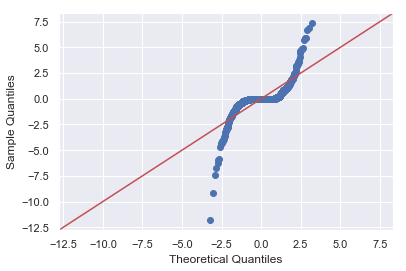

In [68]:
residuals = y_train['Medals Prediction'] - y_train['Medals']
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

# Tokyo 2020 Prediction

In [ ]:
# Make predictions using the testing sets
y_test['Golds Prediction']   = pd.DataFrame(regr_golds.predict(X_test),   columns=['Golds Prediction'])
y_test['Golds Prediction']   = y_test['Golds Prediction'].astype('int64')

y_test['Silvers Prediction'] = pd.DataFrame(regr_silvers.predict(X_test), columns=['Silvers Prediction'])
y_test['Silvers Prediction'] = y_test['Silvers Prediction'].astype('int64')

y_test['Bronzes Prediction'] = pd.DataFrame(regr_bronzes.predict(X_test), columns=['Bronzes Prediction'])
y_test['Bronzes Prediction'] = y_test['Bronzes Prediction'].astype('int64')

y_test                       = y_test.clip(lower=0)
y_test['Medals Prediction']  = y_test['Golds Prediction'] + y_test['Silvers Prediction'] + y_test['Bronzes Prediction']
y_test.head(10)

In [ ]:
# Plot outputs
plt.figure(figsize = (10,6))
sns.set_style("whitegrid")
plt.scatter(X['Events'], y, c='navy', alpha=0.6)
plt.plot(X['Events'], y_pred, color='red', linewidth=3)
plt.show()